In [53]:
import os
import tensorflow as tf
import pandas as pd

## Directories

In [54]:
# Path to test directory
test_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Test"
# Path to train directory
train_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Train"

## Compare training and test data

<Axes: >

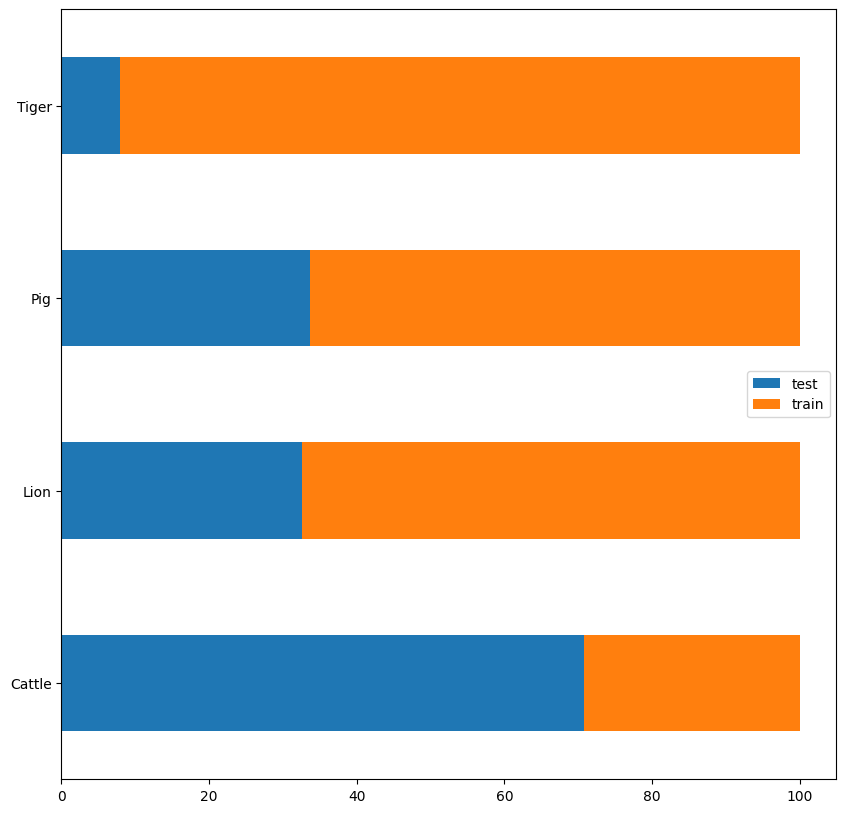

In [56]:
# Access all animal class names present for training and testing
class_names = os.listdir(train_data_dir)

animal_values = []
test_values = []
train_values = []

for name in class_names:
    test_subdirectory_path = os.path.join(test_data_dir, name)
    train_subdirectory_path = os.path.join(train_data_dir, name)
    test_image_count, train_image_count = len(os.listdir(test_subdirectory_path)), len(os.listdir(train_subdirectory_path))
    total_image_count = train_image_count + test_image_count
    test_percent = round((test_image_count / total_image_count) * 100, 2)
    train_percent = round((train_image_count / total_image_count) * 100, 2)

    # Update the lists with appropriate values
    animal_values.append(name)
    test_values.append(test_percent)
    train_values.append(train_percent)

# Create a Pandas Dataframe
df = pd.DataFrame({"test": test_values, "train": train_values}, index=animal_values)

# Plot the data
df.plot(
    kind="barh",
    stacked=True,
    figsize=(
        10,
        10,
    ),
)

## Load data

In [44]:
batch_size = 32
img_height = 180
img_width = 180

train_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.1, rotation_range=0.1, horizontal_flip=True
)
test_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

train_datagen = train_image_data_generator.flow_from_directory(
    train_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height)
)

test_datagen = test_image_data_generator.flow_from_directory(
    test_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height)
)

Found 781 images belonging to 4 classes.
Found 393 images belonging to 4 classes.


## Creating and compiling the model

In [45]:
animals_number = len(class_names)

# Create the model
model = tf.keras.Sequential(
     [
        tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same", input_shape=(img_width, img_height, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(animals_number, name="outputs", activation="softmax"),
    ]
)

adam = tf.keras.optimizers.Adam()

model.compile(
    optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

# Model Summary

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 22, 22, 64)      

## Fit the model

In [47]:
epochs = 15
# Fit the model
history = model.fit(
    train_datagen,
    steps_per_epoch=(train_datagen.samples // batch_size),
    epochs=epochs,
    validation_data=test_datagen,
    validation_steps=(test_datagen.samples // batch_size),
)

Epoch 1/15


c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 23s 921ms/step - loss: 1.3813 - accuracy: 0.3658 - val_loss: 1.5651 - val_accuracy: 0.3021
Epoch 2/15
24/24 [==============================] - 18s 761ms/step - loss: 1.2332 - accuracy: 0.4419 - val_loss: 1.6831 - val_accuracy: 0.0938
Epoch 3/15
24/24 [==============================] - 17s 727ms/step - loss: 1.0744 - accuracy: 0.5260 - val_loss: 1.9616 - val_accuracy: 0.2135
Epoch 4/15
24/24 [==============================] - 17s 721ms/step - loss: 0.9813 - accuracy: 0.6142 - val_loss: 2.4345 - val_accuracy: 0.2526
Epoch 5/15
24/24 [==============================] - 18s 740ms/step - loss: 0.9359 - accuracy: 0.6328 - val_loss: 1.8639 - val_accuracy: 0.3307
Epoch 6/15
24/24 [==============================] - 18s 736ms/step - loss: 0.8460 - accuracy: 0.6582 - val_loss: 1.7709 - val_accuracy: 0.3333
Epoch 7/15
24/24 [==============================] - 18s 743ms/step - loss: 0.8174 - accuracy: 0.6996 - val_loss: 2.1014 - val_accuracy: 0.3281
Epoch 8/15

## Visualize the training results

In [48]:
epochs_range = range(epochs)

training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a pd Dataframe for accuracy
acc_df = pd.DataFrame({"Training Accuracy":training_acc, "Validation Accuracy":validation_acc}, index=epochs_range)
# Create a pd Dataframe for loss
loss_df = pd.DataFrame({"Training Loss":training_loss, "Validation Loss":validation_loss}, index=epochs_range)

<Axes: >

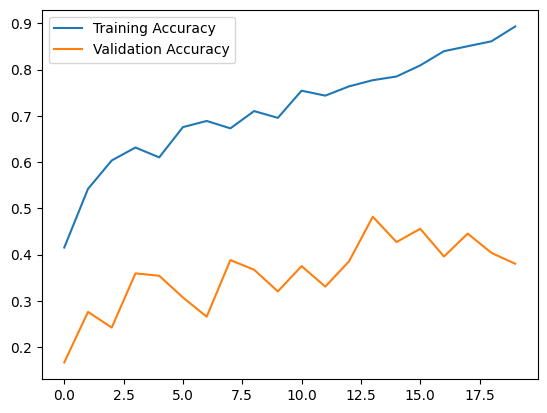

In [25]:
# Plot Accuracy
acc_df.plot()

<Axes: >

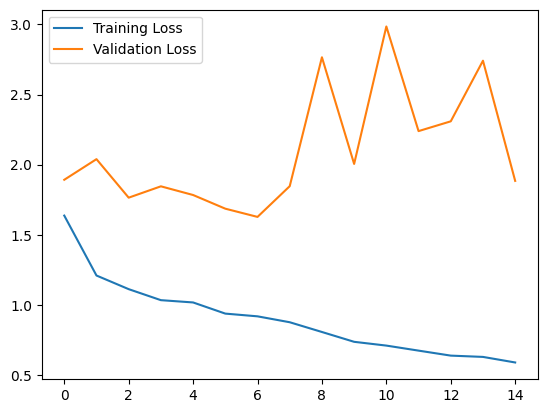

In [35]:
# Plot Loss
loss_df.plot()

## Save the model

In [12]:
# Save the entire model (architecture, weights, and optimizer state) 
model.save("animal_detection_model")
# Save only the weights of the model
model.save_weights("animal_detection_model_weights.h5")

INFO:tensorflow:Assets written to: animal_detection_model\assets


INFO:tensorflow:Assets written to: animal_detection_model\assets


## Visualizing the results on Test Images

Found 393 images belonging to 4 classes.


C:\Users\abhis\AppData\Local\Temp\ipykernel_30388\620982315.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


1/1 [==============================] - 0s 47ms/step


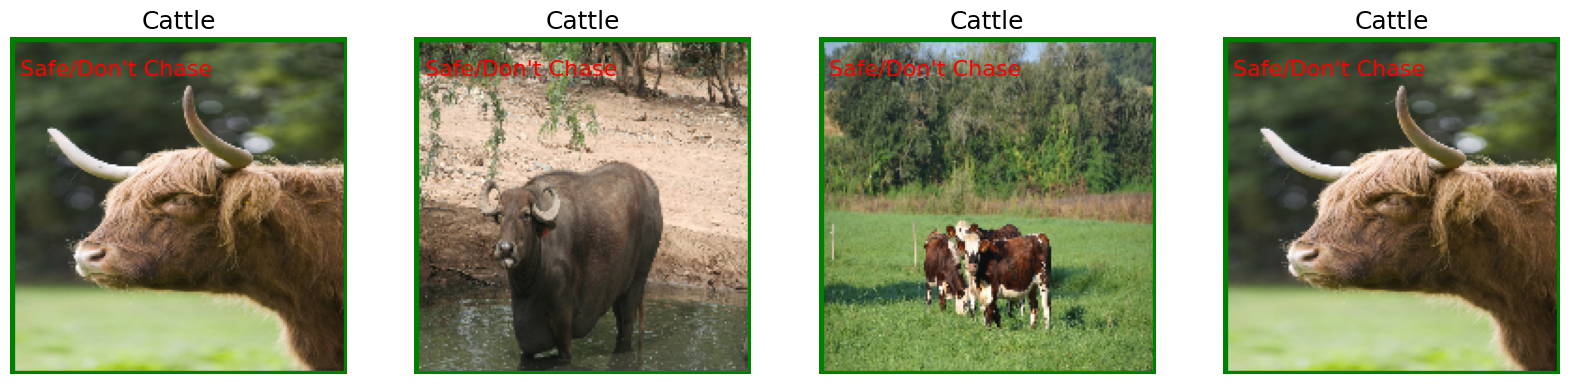

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

# Path to test directory
test_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Test"

# Load the pre-trained model
model = load_model("animal_detection_model")

# Create a data generator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Make predictions on the test set
preds = model.predict_generator(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(preds, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Select 4 random images from the cattle testing set
Cattle_test_dir = os.path.join(test_data_dir, 'Cattle')
Cattle_images = np.random.choice(os.listdir(Cattle_test_dir), size=4)

# Display the images with predictions and colored rectangles
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
for i, ax in enumerate(axes):
    img_path = os.path.join(Cattle_test_dir, Cattle_images[i])
    img = load_img(img_path, target_size=(180, 180))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Get the prediction for the image
    pred = model.predict(img_array)[0]
    class_idx = np.argmax(pred)
    if class_idx == 0:
        class_name = "Not Cattle"
    else:
        class_name = "Cattle"
    
    # Add the class name to the title
    ax.set_title(class_name, fontsize=18)
    
    # Add a colored rectangle around the image based on the class prediction
    if class_name == "Cattle":
        rect_color = 'green'
        ax.text(5, 20, "Safe/Don't Chase", fontsize=16, color='red')
    else:
        rect_color = 'red'
    
    rect = plt.Rectangle((0, 0), img.size[0], img.size[1], linewidth=6, edgecolor=rect_color, facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)
    ax.axis('off')

plt.show()


Found 393 images belonging to 4 classes.


C:\Users\abhis\AppData\Local\Temp\ipykernel_30388\3204364412.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


1/1 [==============================] - 0s 29ms/step


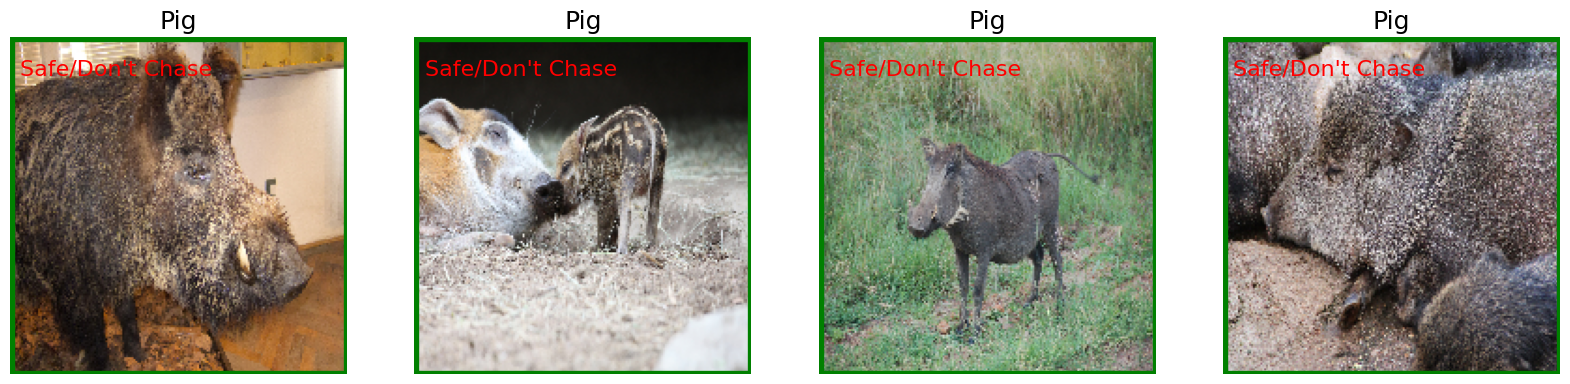

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

# Path to test directory
test_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Test"

# Load the pre-trained model
model = load_model("animal_detection_model")

# Create a data generator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Make predictions on the test set
preds = model.predict_generator(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(preds, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Select 4 random images from the cattle testing set
lion_test_dir = os.path.join(test_data_dir, 'Pig')
lion_images = np.random.choice(os.listdir(lion_test_dir), size=4)

# Display the images with predictions and colored rectangles
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
for i, ax in enumerate(axes):
    img_path = os.path.join(lion_test_dir, lion_images[i])
    img = load_img(img_path, target_size=(180, 180))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Get the prediction for the image
    pred = model.predict(img_array)[0]
    class_idx = np.argmax(pred)
    if class_idx == 0:
        class_name = "Not Pig"
    else:
        class_name = "Pig"
    
    # Add the class name to the title
    ax.set_title(class_name, fontsize=18)
    
    # Add a colored rectangle around the image based on the class prediction
    if class_name == "Pig":
        rect_color = 'green'
        ax.text(5, 20, "Safe/Don't Chase", fontsize=16, color='red')
    else:
        rect_color = 'red'
    
    rect = plt.Rectangle((0, 0), img.size[0], img.size[1], linewidth=6, edgecolor=rect_color, facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)
    ax.axis('off')

plt.show()


Found 393 images belonging to 4 classes.


C:\Users\abhis\AppData\Local\Temp\ipykernel_30388\126654155.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


1/1 [==============================] - 0s 52ms/step


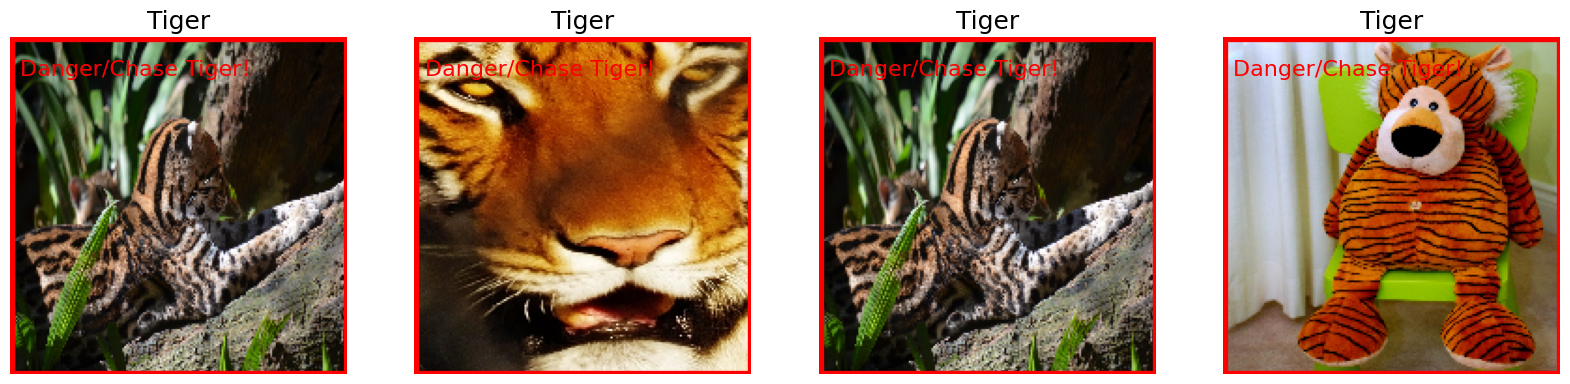

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

# Path to test directory
test_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Test"

# Load the pre-trained model
model = load_model("animal_detection_model")

# Create a data generator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Make predictions on the test set
preds = model.predict_generator(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(preds, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Select 4 random images from the cattle testing set
lion_test_dir = os.path.join(test_data_dir, 'Tiger')
lion_images = np.random.choice(os.listdir(lion_test_dir), size=4)

# Display the images with predictions and colored rectangles
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
for i, ax in enumerate(axes):
    img_path = os.path.join(lion_test_dir, lion_images[i])
    img = load_img(img_path, target_size=(180, 180))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Get the prediction for the image
    pred = model.predict(img_array)[0]
    class_idx = np.argmax(pred)
    if class_idx == 0:
        class_name = "Not Tiger"
    else:
        class_name = "Tiger"
    
    # Add the class name to the title
    ax.set_title(class_name, fontsize=18)
    
    # Add a colored rectangle around the image based on the class prediction
    if class_name == "Tiger":
        rect_color = 'red'
        ax.text(5, 20, "Danger/Chase Tiger!", fontsize=16, color='red')
    else:
        rect_color = 'green'
    
    rect = plt.Rectangle((0, 0), img.size[0], img.size[1], linewidth=6, edgecolor=rect_color, facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)
    ax.axis('off')

plt.show()


Found 393 images belonging to 4 classes.


C:\Users\abhis\AppData\Local\Temp\ipykernel_30388\2192441042.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


1/1 [==============================] - 0s 24ms/step


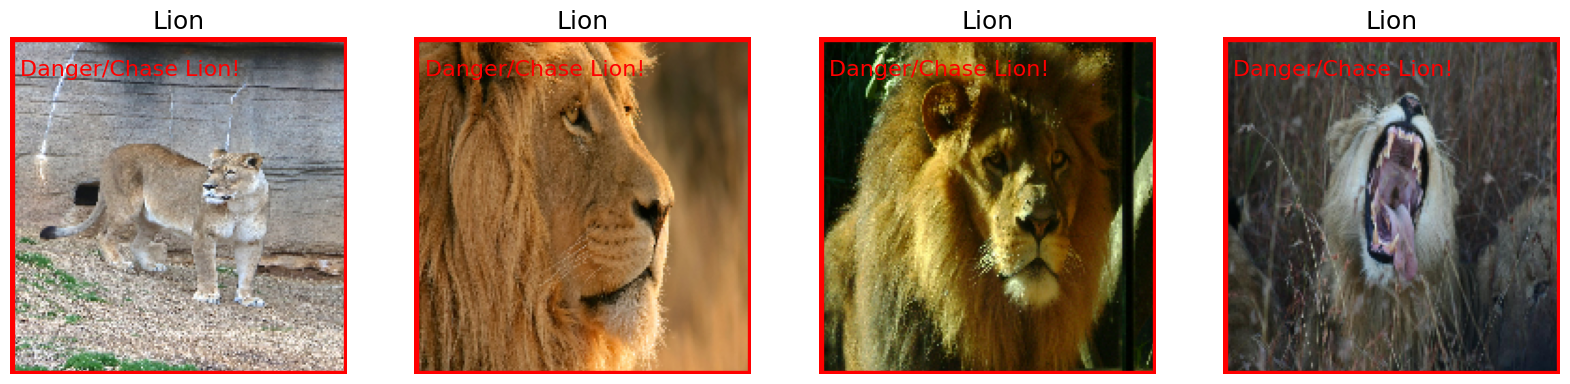

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

# Path to test directory
test_data_dir = "C:\\Users\\abhis\\Desktop\\Animal Detect_scratch\\Test"

# Load the pre-trained model
model = load_model("animal_detection_model")

# Create a data generator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Make predictions on the test set
preds = model.predict_generator(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(preds, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Select 4 random images from the cattle testing set
lion_test_dir = os.path.join(test_data_dir, 'Lion')
lion_images = np.random.choice(os.listdir(lion_test_dir), size=4)

# Display the images with predictions and colored rectangles
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
for i, ax in enumerate(axes):
    img_path = os.path.join(lion_test_dir, lion_images[i])
    img = load_img(img_path, target_size=(180, 180))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Get the prediction for the image
    pred = model.predict(img_array)[0]
    class_idx = np.argmax(pred)
    if class_idx == 0:
        class_name = "Not Lion"
    else:
        class_name = "Lion"
    
    # Add the class name to the title
    ax.set_title(class_name, fontsize=18)
    
    # Add a colored rectangle around the image based on the class prediction
    if class_name == "Lion":
        rect_color = 'red'
        ax.text(5, 20, "Danger/Chase Lion!", fontsize=16, color='red')
    else:
        rect_color = 'green'
    
    rect = plt.Rectangle((0, 0), img.size[0], img.size[1], linewidth=6, edgecolor=rect_color, facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)
    ax.axis('off')

plt.show()
